In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import pandas as pd

In [2]:
df=pd.read_csv("charleston.csv", sep=",")

In [3]:
df.shape

(1227, 2)

In [5]:
date = df.iloc[:, 0]
sl = df.iloc[:, 1]
date

0       1921.7917
1       1921.8750
2       1921.9583
3       1922.0417
4       1922.1250
          ...    
1222    2023.6250
1223    2023.7083
1224    2023.7917
1225    2023.8750
1226    2023.9583
Name: year, Length: 1227, dtype: float64

Text(0, 0.5, 'Sea level')

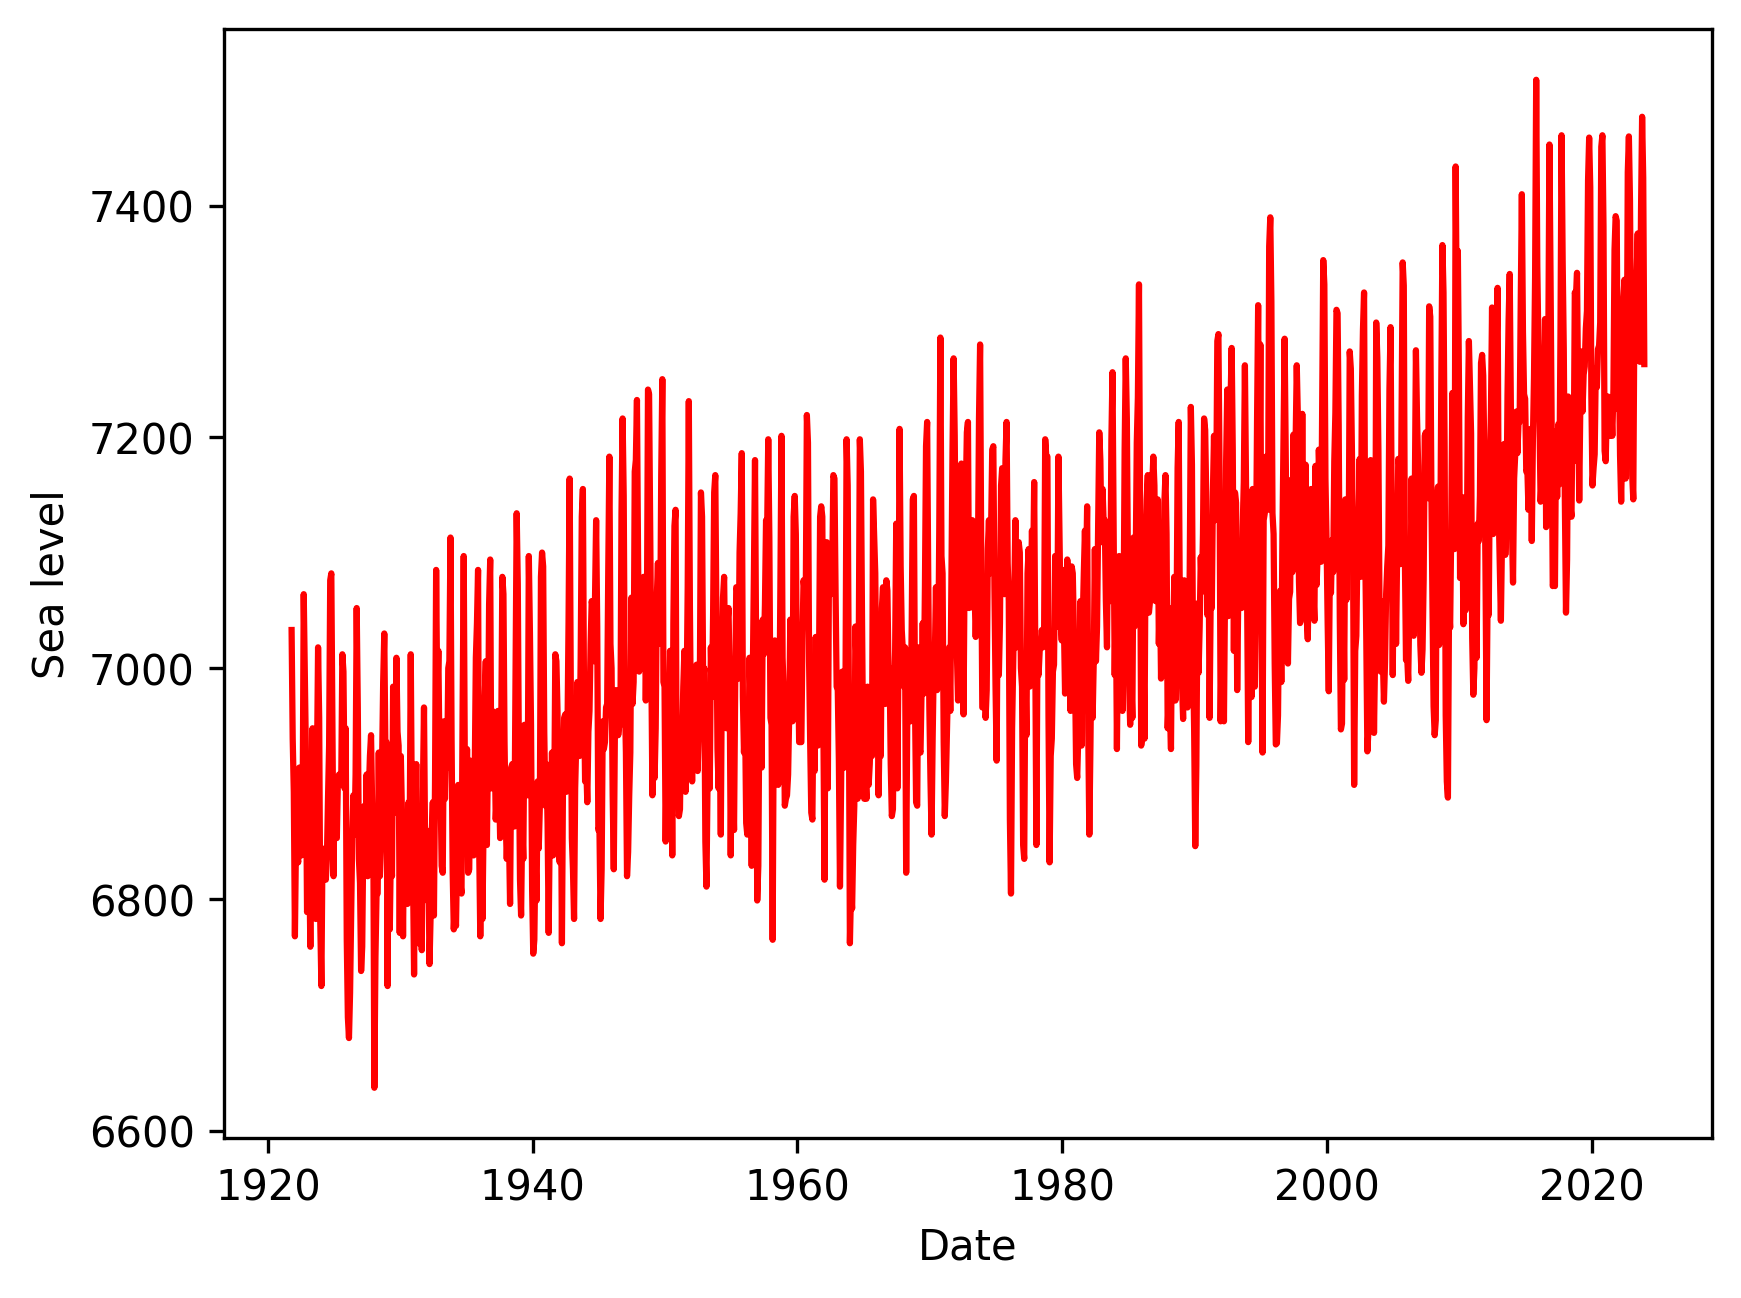

In [6]:
plt.figure(dpi = 300)
plt.plot(date, sl, "r-")
plt.xlabel("Date")
plt.ylabel("Sea level")

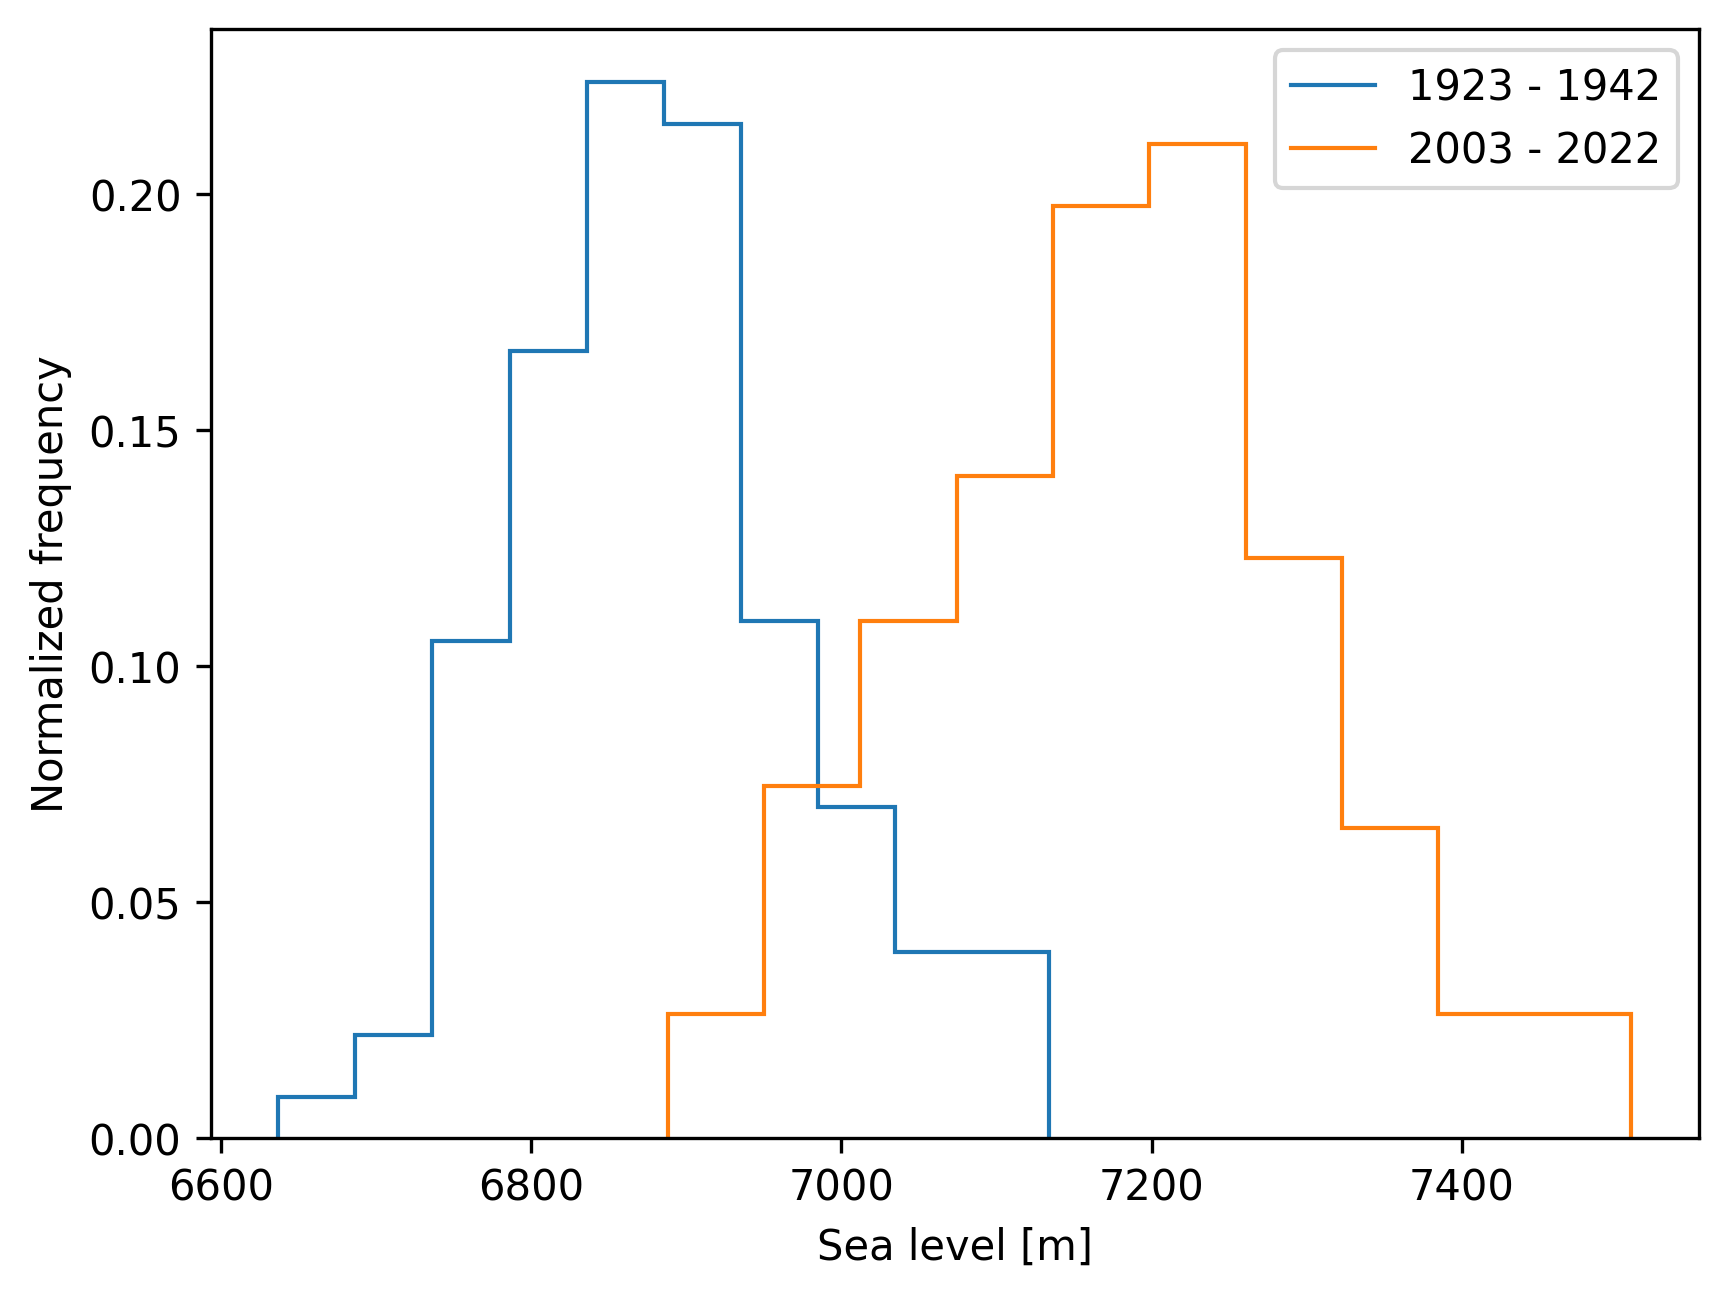

In [7]:
# 2. Plot the histograms of sea level data for these time periods on top of each other: 1923-1942, 2003-2022
plt.figure(dpi = 300)
counts, bins = np.histogram(sl[(date > 1923) & (date < 1942)])
plt.stairs(counts/np.sum(counts), bins, label = "1923 - 1942") 
counts, bins = np.histogram(sl[(date > 2003) & (date < 2022)])
plt.stairs(counts/np.sum(counts), bins, label = "2003 - 2022") 
plt.xlabel("Sea level [m]")
plt.ylabel("Normalized frequency")
plt.legend()

In [17]:
1/12

0.08333333333333333

In [18]:
4 * 0.08333333333333333

0.3333333333333333

In [19]:
0.333 + 0.083

0.41600000000000004

In [12]:
df['year']

0       1921.7917
1       1921.8750
2       1921.9583
3       1922.0417
4       1922.1250
          ...    
1222    2023.6250
1223    2023.7083
1224    2023.7917
1225    2023.8750
1226    2023.9583
Name: year, Length: 1227, dtype: float64

In [13]:
may = df[(df['year'] % 1 >= 0.3333) & (df['year'] % 1 < 0.4167)]

In [15]:
may

,year,sea_level
7,1922.375,6914
19,1923.375,6948
31,1924.375,6817
43,1925.375,6908
55,1926.375,6856
...,...,...
1171,2019.375,7254
1183,2020.375,7243
1195,2021.375,7201
1207,2022.375,7320


In [17]:
may_mean = np.mean(may['sea_level'])
may_mean1 = np.mean(may[(may['year'] > 1923) & (may['year'] < 1942)]['sea_level'])
may_mean2 = np.mean(may[(may['year'] > 2003) & (may['year'] < 2022)]['sea_level'])

In [53]:
nyr = int(np.max(df[0]) - np.min(df[0]))
nyr1 = int(np.max(may[(may[0] > 1923) & (may[0] < 1942)][0]) - np.min(may[(may[0] > 1923) & (may[0] < 1942)][0]))
nyr2 = int(np.max(may[(may[0] > 2003) & (may[0] < 2022)][0]) - np.min(may[(may[0] > 2003) & (may[0] < 2022)][0]))

tval1 = (may_mean1 - may_mean)/(np.std(may[(may[0] > 1923) & (may[0] < 1942)][1],ddof=1)/np.sqrt(nyr1-1))
tval2 = (may_mean2 - may_mean)/(np.std(may[(may[0] > 2003) & (may[0] < 2022)][1],ddof=1)/np.sqrt(nyr2-1))

In [55]:
tval2

8.302009292169355

In [56]:
tcrit1 = scipy.stats.t.ppf(0.95, nyr1-1)
tcrit2 = scipy.stats.t.ppf(0.95, nyr2-1)

In [59]:
tval1 > tcrit1

False

tval1 < tcrit1 so we cannot reject the null hypothesis that the mean May sea level from each 1923 to 1942 is the same as the long-term mean.

In [60]:
tval2 > tcrit2

True

tval1 > tcrit1 so we can reject the null hypothesis that the mean May sea level from each 2003 to 2022 is the same as the long-term mean.